# Importing general libraries

#### The OpenCV library is installed for executing image processing tasks, whereas NumPy is used for array manipulations and Matplotlib for rendering and visualizing image data.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Adding the image

#### Image upload and display setup

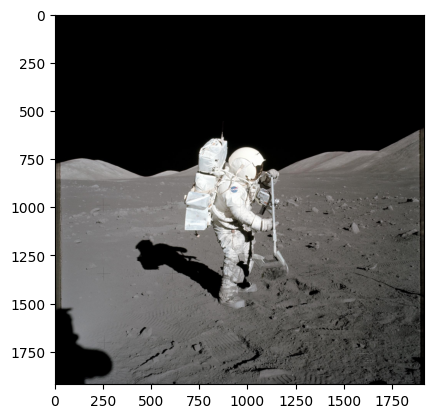

In [8]:
image_path = './man_on_moon.jpg'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

# Mean Filter

#### A mean filter is applied using a 45×45 convolution kernel. This linear spatial filtering technique computes the output pixel value as the arithmetic mean of the intensities within the 45×45 neighborhood, effectively performing low-pass filtering to reduce high-frequency noise.

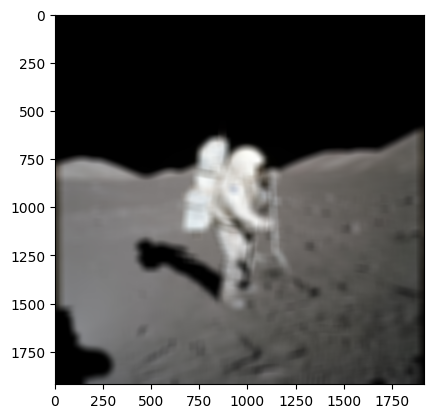

In [9]:
mean_filtered_image = cv2.blur(image, (45, 45))

plt.imshow(mean_filtered_image)
plt.show()

# Median Filter

#### A median filter is applied using a 45×45 kernel. In this non-linear spatial filtering process, the pixel values within the kernel window are sorted, and the central pixel is replaced with the median value of the sorted list, effectively preserving edges while reducing impulsive noise.

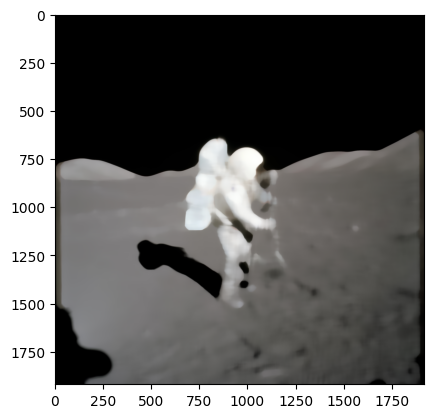

In [10]:
median_filtered_image = cv2.medianBlur(image, 45)

plt.imshow(median_filtered_image)
plt.show()

# Sobel Filter

A combined Sobel filter with a 3×3 kernel is applied for edge detection. The Sobel-Feldman operator, a widely used gradient-based method in image processing and computer vision, computes the first-order derivatives in both the horizontal and vertical directions. By combining the responses from the Sobel-X and Sobel-Y filters, it effectively highlights regions with significant intensity gradients, corresponding to object boundaries.

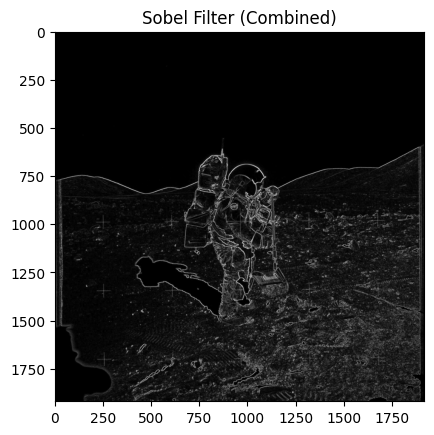

In [14]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction

sobelx_abs = cv2.convertScaleAbs(x)
sobely_abs = cv2.convertScaleAbs(y)
sobel_combined = cv2.addWeighted(sobelx_abs, 0.5, sobely_abs, 0.5, 0)
plt.imshow(sobel_combined,cmap='gray')
plt.title('Sobel Filter (Combined)')
plt.show()

# Side by side view

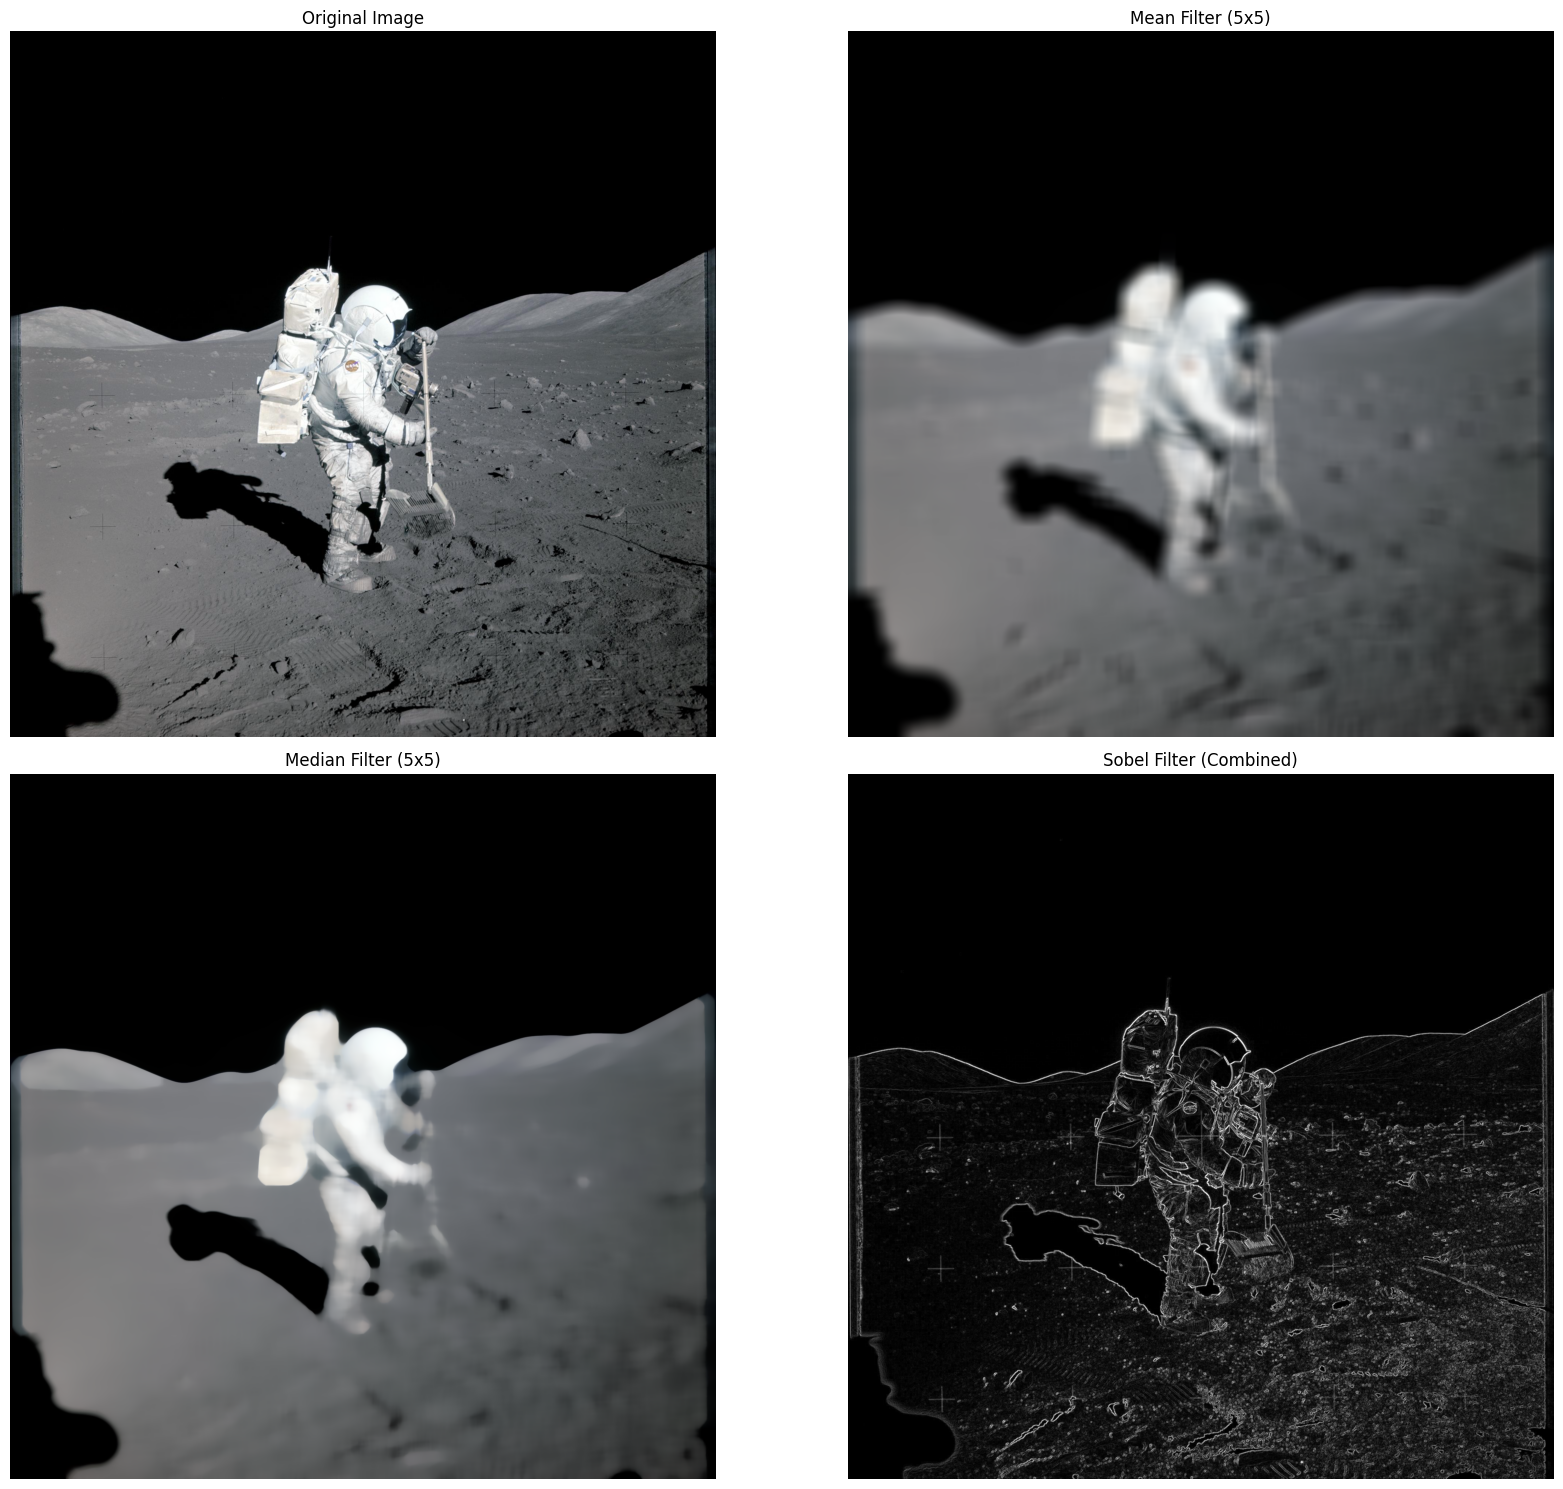

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(mean_filtered_image, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Mean Filter (5x5)')
axes[0, 1].axis('off')

axes[1, 0].imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Median Filter (5x5)')
axes[1, 0].axis('off')

axes[1, 1].imshow(sobel_combined, cmap='gray')
axes[1, 1].set_title('Sobel Filter (Combined)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()